In [1]:
import os
import numpy as np
import random as rd
import matplotlib.pyplot as plt

os.chdir(r'/home/iankohl/Documents/projects/IA/trabalho02_reconhecedor_de_digitos/')
file = np.loadtxt('matrix.txt')
(amostras, inputs) = np.shape(file)
target = np.loadtxt('results.txt')
(numClasses, targets) = np.shape(target)
weight = np.zeros((inputs, numClasses))
bias = np.zeros(numClasses)


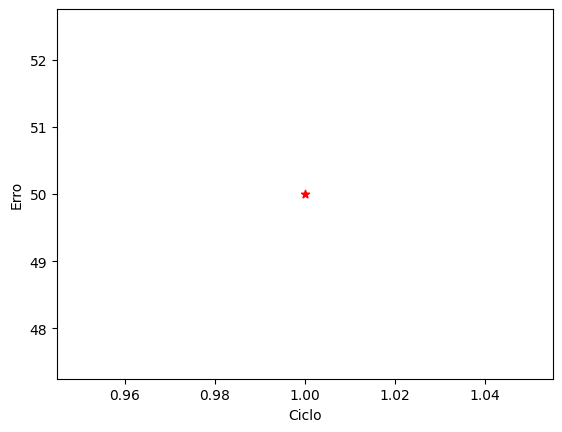


A LETRA RECONHECIDA FOI A LETRA: K


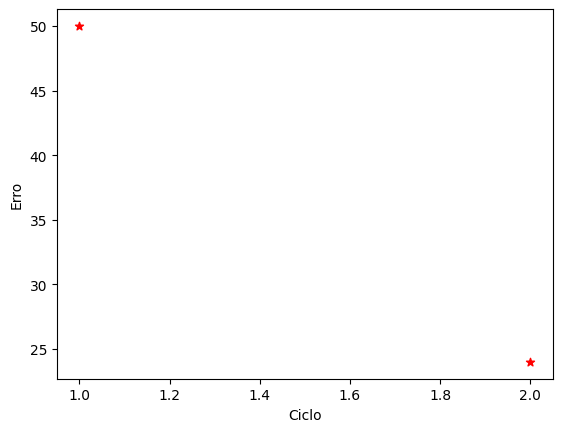


NÃO FOI POSSÍVEL RECONHECER NENHUMA LETRA


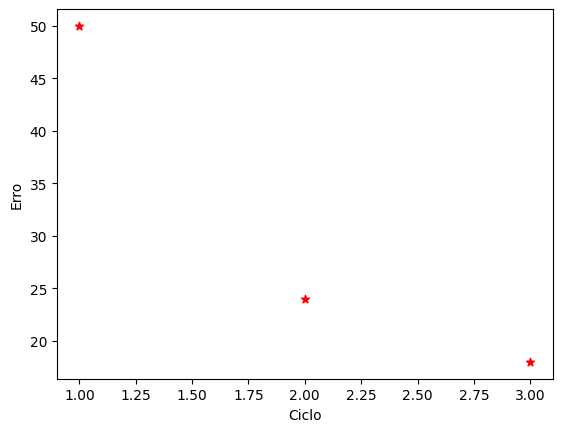


A LETRA RECONHECIDA FOI A LETRA: K


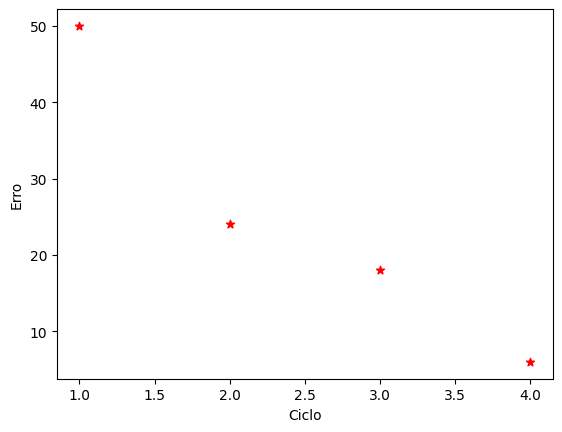


A LETRA RECONHECIDA FOI A LETRA: K


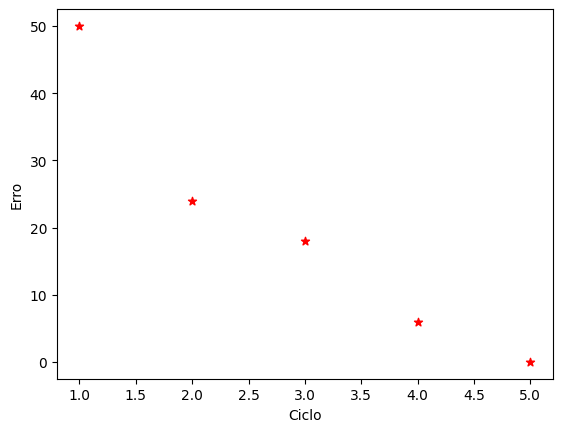


A LETRA RECONHECIDA FOI A LETRA: K


In [2]:

limiar = 0.0
alfa = 0.1
erroTolarated = 0.0001

for line in range(inputs):
    for column in range(numClasses):
        weight[line][column] = rd.uniform(-0.1,0.1)

for line in range(numClasses):
    bias[column] = rd.uniform(-0.1,0.1)

vetor1=[]
vetor2=[]

yin=np.zeros((numClasses, 1))
y=np.zeros((numClasses, 1))

erro=10
ciclo= 0
while erro > erroTolarated:
    ciclo=ciclo+1
    erro=0
    for line in range(amostras):
        allColumnValuesPerLine = file[line,:]
        for m in range(numClasses):
            soma=0
            for n in range(inputs):
                soma=soma+allColumnValuesPerLine[n]*weight[n][m]
            yin[m]=soma+bias[m]

        for column in range(numClasses):
            if yin[column] > limiar:
                y[column]=1.0
            elif yin[column] < -limiar:
                y[column]=-1.0

        for column in range(numClasses):
            erro=erro + 0.5 * ((target[column][line]-y[column])**2)
        
        vanteriror=weight

        for m in range(inputs):
            for n in range(numClasses):
                weight[m][n]=vanteriror[m][n]+alfa*(target[n][line]-y[n])*allColumnValuesPerLine[m]
        
        previousBias=bias

        for column in range(numClasses):
            bias[column]=previousBias[column]+alfa*(target[column][line]-y[column])
        
    
    vetor1.append(ciclo)
    vetor2.append(erro)

    plt.scatter(vetor1, vetor2, marker='*', color='red')
    plt.xlabel('Ciclo')
    plt.ylabel('Erro')
    plt.show()

   


In [18]:
xtexte = file[1,:]
for m2 in range(numClasses):
    soma=0
    for n2 in range(inputs):
        soma = soma + xtexte[n2] * weight[n2][m2]
        yin[m2] = soma + bias[m2]
print(yin)
for j in range(numClasses):
    if(yin[j] > 0):
        y[j] = 1
    else:
        y[j] = -1
print(y)
if y[0] == 1:
    print("A LETRA RECONHECIDA FOI A LETRA: A")
elif y[1] == 1:
    print("A LETRA RECONHECIDA FOI A LETRA: B")
elif y[2] == 1:
    print("A LETRA RECONHECIDA FOI A LETRA: C")
elif y[3] == 1:
    print("A LETRA RECONHECIDA FOI A LETRA: D")
elif y[4] == 1:
    print("A LETRA RECONHECIDA FOI A LETRA: E")
elif y[5] == 1:
    print("A LETRA RECONHECIDA FOI A LETRA: J")
elif y[6] == 1:
    print("A LETRA RECONHECIDA FOI A LETRA: K")
else:
    print("NÃO FOI POSSÍVEL RECONHECER NENHUMA LETRA")

[[  6.85389689]
 [-12.90024786]
 [-11.75483032]
 [-10.49386808]
 [ -4.62997703]
 [ -9.41264409]
 [ -3.64801504]]
[[ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]
A LETRA RECONHECIDA FOI A LETRA: A
